In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Reshape, SimpleRNN, Dense, Flatten
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
train = np.load('train_data.npz', allow_pickle=True)

In [3]:
valid = np.load('valid_data.npz', allow_pickle=True)

In [4]:
# Access the arrays
train_images = train['images']
train_labels = train['labels']

In [5]:
valid_images = valid['images']
valid_labels = valid['labels']

In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_labels)
valid_labels = label_encoder.fit_transform(valid_labels)

In [7]:
len(np.unique(train_labels))

78

In [8]:
len(train_images)

3120

In [9]:
len(train_labels)

3120

In [10]:
train_images[0].shape

(64, 64, 1)

In [11]:
datagen = ImageDataGenerator(
    rotation_range=5,  
    zoom_range=0.1, 
    fill_mode='nearest' 
)

In [12]:
augmented_images = []
augmented_labels = []

for i in range(len(train_images)):
    img = train_images[i]
    label = train_labels[i]
    img = np.expand_dims(img, 0)
    for augmented_img in datagen.flow(img, batch_size=1):
        augmented_images.append(augmented_img[0])
        augmented_labels.append(label)
        break 
augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)

In [13]:
# Define input shape
input_shape = augmented_images[0].shape 
num_classes = len(np.unique(augmented_labels)) 

In [14]:
from tensorflow.keras.models import Sequential

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Reshape((-1, 128)))  
model.add(SimpleRNN(128, return_sequences=False)) 
model.add(Dense(num_classes, activation='softmax')) 

In [15]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
    augmented_images, augmented_labels,
    validation_data=(valid_images, valid_labels),
    epochs=25,
    batch_size=32,
)


Epoch 1/25


98/98 [==============================] - 11s 82ms/step - loss: 4.3623 - accuracy: 0.0147 - val_loss: 4.2803 - val_accuracy: 0.0167
Epoch 2/25
98/98 [==============================] - 7s 75ms/step - loss: 4.1740 - accuracy: 0.0423 - val_loss: 3.9396 - val_accuracy: 0.0936
Epoch 3/25
98/98 [==============================] - 7s 74ms/step - loss: 3.5886 - accuracy: 0.1468 - val_loss: 3.0123 - val_accuracy: 0.2474
Epoch 4/25
98/98 [==============================] - 7s 77ms/step - loss: 2.7963 - accuracy: 0.3077 - val_loss: 2.3557 - val_accuracy: 0.4359
Epoch 5/25
98/98 [==============================] - 7s 75ms/step - loss: 2.1818 - accuracy: 0.4625 - val_loss: 1.9763 - val_accuracy: 0.5346
Epoch 6/25
98/98 [==============================] - 7s 74ms/step - loss: 1.7409 - accuracy: 0.5686 - val_loss: 1.7968 - val_accuracy: 0.5679
Epoch 7/25
98/98 [==============================] - 7s 74ms/step - loss: 1.3849 - accuracy: 0.6641 - val_loss: 1.5882 - val_accuracy: 0.6218
Epoch 8/2

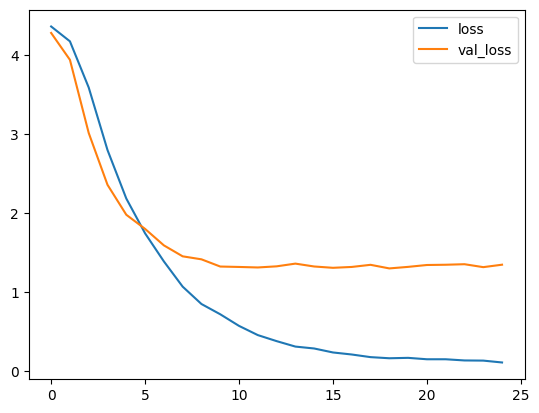

In [22]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

In [23]:
test = np.load('test_data.npz',allow_pickle=True)

In [24]:
test_images = test['images']
test_labels = test['labels']

In [25]:
test_labels = label_encoder.fit_transform(test_labels)

In [26]:
# Evaluate the model
loss, accuracy = model.evaluate(test_images,test_labels)

25/25 [==============================] - 1s 20ms/step - loss: 2.0669 - accuracy: 0.6064
